In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import cv2

# description


data ที่ใช้จะเป็น Chest X-Ray Images (Pneumonia)
 * เป็นข้อมูลภาพ X-Ray ของ Lung โดยรวมรูป ปอดที่อักเสพเเล้วปอดที่ไม่อักเสพ ทั้งหมด 5856 รูป
 * ข้อมูลเป็นข้อมูล Raw ดิบ โดยขนาดหรือความคมชัดเเต่ละรูปนั้นไม่เท่ากัน จึงยากต่อการ Train
 * updated 3 years ago (Version 2)


Tpye JPEG
 * ฟล์ประเภท JPEG หรือ JPG ( Joint Photographic Expers Group )
      เป็นไฟล์ที่มีคุณภาพสูง ที่ผ่านกระบวนการบีบอัด อาจมีขนาดเหลือเพียง 10 - 30 % ขนาดของการบีบข้อมูล มีได้ 3 ระดับ ( High , Middle , Low Compression )

class NOMAL, PNEUMONIA


# ความท้าทายในโจทย์นี้
 * โจทย์นี้เป็นข้อมูลทางการเเพทย์ ที่ลายละเอียดสูง
 * ข้อมูลรูป raw ที่ไม่มีการจัดเตรียมอะไรไว้ให้เลย 
 * ข้อมูลที่อ่านเข้ามา นั้นมีขนาด เเต่ละรูป เเละความคมชัดที่เเตกต่างกัน
 * จัดการข้อมูลทั้งหมด เเละ จัดการทรัพยากรให้เครื่องพอที่จะ Train ได้
 * เลือก Model เหมาะสม

.
.
.

# เเสดงภาพที่เป็น NOMAL

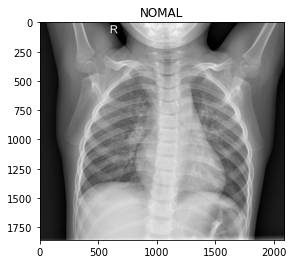

(1858, 2090, 3)

In [12]:
nomal1 = cv2.imread(r'C:\Users\Nakkarin Tepin\Pictures\IM-0115-0001.JPEG')
plt.imshow(nomal1, cmap ='Greens')

#plt.imshow(nomal1)
plt.title('NOMAL')
plt.show()
nomal1.shape

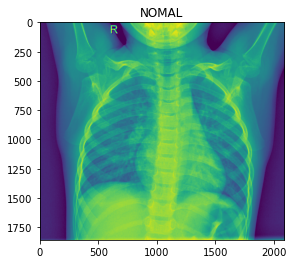

(1858, 2090)

In [20]:
nomal1 = cv2.imread(r'C:\Users\Nakkarin Tepin\Pictures\IM-0115-0001.JPEG', 0)
#plt.imshow(nomal1, cmap='hot')
plt.imshow(nomal1)
plt.title('NOMAL')
plt.show()
nomal1.shape

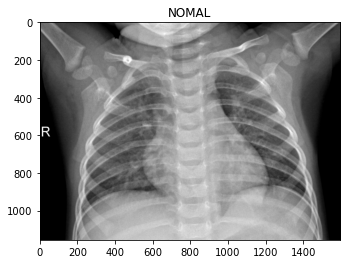

(1156, 1596, 3)

In [14]:
nomal2 = cv2.imread(r'C:\Users\Nakkarin Tepin\Pictures\IM-0145-0001.JPEG')
plt.imshow(nomal2)
plt.title('NOMAL')
plt.show()
nomal2.shape

# เเสดงภาพที่เป็น PNEUMONIA

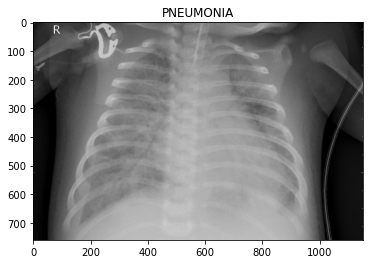

(760, 1152, 3)

In [15]:
pm1 = cv2.imread(r'C:\Users\Nakkarin Tepin\Pictures\person1000_bacteria_2931.JPEG')
plt.imshow(pm1)
plt.title('PNEUMONIA')
plt.show()
pm1.shape

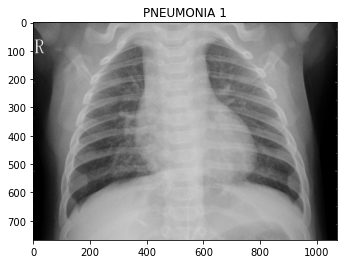

(768, 1072, 3)

In [16]:
pm2 = cv2.imread(r'C:\Users\Nakkarin Tepin\Pictures\person1000_virus_1681.jpeg')
plt.imshow(pm2)
plt.title('PNEUMONIA 1')
plt.show()
pm2.shape

# function นี้สร้างไว้เพื่อมาเเบ่งข้อมูล input เเล้ว target ออกจากกัน
   * ฟังก์ชั่นนี้ สร้างไว้สำหรับ เเบ่งข้อมูล รูป กับ class จะreturn ออกไปเป็น 
   * inputs ที่เป็นข้อมูลภาพ
   * targets ข้อมูลที่ระบุว่าภาพนั้นเป็น class อะไร

In [2]:
def splitFeature(datas): 
    inputs = []
    targets = []
    for x, y in datas:
        inputs.append(x)
        targets.append(y)
    
    return inputs, targets

function สำหรับ ทำ ข้อมูล targets ให้อยู่ในรูปเเบบ oneHot encoder

In [3]:
#ทำไว้เผื่อใช้
def oneHot(data, n_class):
    y = np.zeros((data, n_class))
    for i, y in enumerate(data):
        y[i, data[i]] = 1
        print(y)
    return y
    

# Function ที่เอาข้อมูล ที่เเบ่ง NOMAL กับ PNEUMOIN ที่เเยกกันอยู่เข้ามาเก็บไว้ให้เป็นก้อนเดียวกัน
 * ฟังชั่นที่เป็นฟังก์ชั่น ที่ใช้ได้เเค่ Data PNEUMONIA เท่านั้น สร้างมาเพื่อเเก้ไขข้อมูลที่เเยกกกันอยู่เพียงทำนั้น
 * จะมีการส่งค่า class ให้เป็น OneHot Encoder อีกด้วย 

In [4]:
def concatData(n, p):
    features_nomal = []
    targets_nomal = []
    
    
    features_pneumoni = []
    targets_pneumoni = []
    
    for f, t in n:
        features_nomal.append(f)
        targets_nomal.append(t)

    x_nomal = np.array(features_nomal)
    y_nomal = np.array(targets_nomal)
    

    for f, t in p:
        features_pneumoni.append(f)
        targets_pneumoni.append(t)
        
    
    x_pneumoni = np.array(features_pneumoni)
    y_pneumoni = np.array(targets_pneumoni)
    
    X = np.concatenate((x_nomal, x_pneumoni))
    Y = np.concatenate((y_nomal, y_pneumoni))
    
    Y = tf.one_hot(Y, 2)
    
    return np.array(X), Y

In [5]:
def concatData2(n, p):
    features_nomal = []
    targets_nomal = []
    
    
    features_pneumoni = []
    targets_pneumoni = []
    
    for f, t in n:
        features_nomal.append(f)
        targets_nomal.append(t)

    x_nomal = np.array(features_nomal)
    y_nomal = np.array(targets_nomal)
    

    for f, t in p:
        features_pneumoni.append(f)
        targets_pneumoni.append(t)
        
    
    x_pneumoni = np.array(features_pneumoni)
    y_pneumoni = np.array(targets_pneumoni)
    
    X = np.concatenate((x_nomal, x_pneumoni))
    Y = np.concatenate((y_nomal, y_pneumoni))
        
    return np.array(X), Y

# สร้าง Function ทำหรับโหลดข้อมูลมาจัดเก็บไว้ LIST 
 * เนื่องจาก Data นั้น เก็บไว้ในเครื่องคอมพิวเตอร์ จึงจำเป็นต้องโหลดข้อมูลเข้ามาเก็บไว้ 
 * เเต่ว่าข้อมูลที่อ่านเข้ามานั้นเป็นรูป จะไม่สามารถ Train ได้ จึงใช้ Lib ช่วย ในการอ่านไฟล์รูปเข้ามาเป็น Array ได้ โดยใช้ cv2
 * รูปที่อ่านเข้ามานั้นจะถูกจัดเก็บไว้ใน Paramiter ที่ส่งเข้ามา appended-list พร้อมกับ class_type ที่ส่งเข้าไปพร้อมกันกับ     ข้อมูลรูป จะได้เป็น 
 * appended-list [รูปที่อ่านเข้ามาเป็นArray, ตัวเลขที่ระบุว่ารูปที่อ่านเข้ามานั้นคืออะร]

In [6]:
def image_import (img_path, class_type, appended_list):
    
    for i in os.listdir(img_path):
        read_path = os.path.join(img_path, i)
        
        try:
            img = cv2.imread(read_path)# return Array 
            img = cv2.resize(img, (224, 224))
            #print(img.shape)

            appended_list.append([img, class_type])
            
        except Exception as e:
            print(f'Image error: {i}')
            pass
        
   
#os.listdir(path)
#path = f'C:\DataSet\Chest X-Ray Images (Pneumonia)\train\PNEUMONIA'
#dirs = os.listdir(path)
#for i in dirs:
    #print(i)

In [7]:
#Exsample np.savez('data', inputs= train_inputs, targets = train_targets)
#โดย Class นี้มีไว้สำหรับเเบ่ง Batch เพื่อเข้าไป Train เเต่จะยังไม่ทำเป็น Onehot
#ก่อนที่ที่จะทำการส่งค่าParamiter เข้าไปเเนะนำให้ส่ง Y ที่เป็น onehot
class MiniBatch():
    
    #Parameter ที่ส่งเข้าไป  จะเป็น dataset ที่เซิฟเป็น numpy array (.npz)
    #เเล้วก็ขนาด batch ที่เรากำหนดขึ้นมา
    #n_class เพื่อที่จะทำ OneHot
    def __init__(self, dataset, batch_size = None): #batch_size = None เพื่อยังไม่ให้  bathc เผื่อที่จะให้จัดการเก็บขนาด data
  
        npz = np.load(f'{dataset}.npz')#load file numpy .npz
        #สามารถsave ผ่าน function np.save()
        self.inputs, self.targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

        if batch_size is None:
            self.batch_size = self.inputs.shape[0]#รับจำนวนdataเข้ามา
            print('You Not done aissing Batch_size')
            
        else: # ตั้งเงื่อนไขถ้ามีการส่ง paramiter batch เข้ามาให้จัดการเเบ่งทันที
            self.batch_size = batch_size 
        self.curr_batch = 0
        self.batch_count = self.inputs.shape[0] // self.batch_size #หารเพื่อเอาช่วง batch
    
    def __next__(self):
        
        
        if self.curr_batch >= self.batch_count:#เมื่อเเบ่งข้อมูลเสร็จก็ให้ออก
            self.curr_batch = 0
            raise StopIteration()

        batch_slice = slice(self.curr_batch * self.batch_size, (self.curr_batch + 1) * self.batch_size)
        inputs_batch = self.inputs[batch_slice]
        targets_batch = self.targets[batch_slice]
        self.curr_batch += 1

        

            
        return inputs_batch, targets_batch
        #targets_one_hot


   
    def __iter__(self):
        return self


In [8]:
train_pneumoni = []
train_nomal = []

test_nomal = []
test_pneumoni = []



In [9]:
val_nomal = []
val_pneumoni = []

* จะเห็นได้เลยว่า การจัดเก็บข้อมูล NOMAL กับ PNEUMONI นั้น อยู่คนละ ตัวเเปรกัน จึงต้องสร้าง Function concatData เพื่อมาจัดการรวมเอาข้อมูลทั้งหมดมารวมกันไว้ในตัวเเปรเดียว

# Train data

In [10]:
path_train_pneumoni = r'C:\DataSet\Chest X-Ray Images (Pneumonia)\train\PNEUMONIA'
image_import(path_train_pneumoni,1, train_pneumoni)

path_train_nomal = r'C:\DataSet\Chest X-Ray Images (Pneumonia)\train\NORMAL'
image_import(path_train_nomal, 0,train_nomal)


# Test data

In [11]:
path_test_pneumoni = r'C:\DataSet\Chest X-Ray Images (Pneumonia)\test\PNEUMONIA'
path_test_nomal = r'C:\DataSet\Chest X-Ray Images (Pneumonia)\test\NORMAL'

image_import(path_test_pneumoni,1, test_pneumoni)
image_import(path_test_nomal, 0, test_nomal)

# Val data

In [12]:
path_val_pneumoni = r'C:\DataSet\Chest X-Ray Images (Pneumonia)\val\PNEUMONIA'
path_val_nomal = r'C:\DataSet\Chest X-Ray Images (Pneumonia)\val\NORMAL'

image_import(path_test_pneumoni,1, val_pneumoni)
image_import(path_test_nomal, 0, val_nomal)

# รวมชุด Train

In [13]:
print ('nomal', len(train_nomal))
print ('pneumoni', len(train_pneumoni))
print('all', len(train_nomal) + len(train_pneumoni))

nomal 1341
pneumoni 3875
all 5216


# รวมชุด Test

In [14]:
print ('nomal', len(test_nomal))
print ('pneumoni', len(test_pneumoni))
print('all', len(test_nomal) + len(test_pneumoni))

nomal 234
pneumoni 390
all 624


In [17]:
x_train, y_train = concatData(train_nomal, train_pneumoni)
x_test, y_test = concatData(test_nomal, test_pneumoni)


In [18]:
x_train

array([[[[ 24,  24,  24],
         [ 20,  20,  20],
         [ 19,  19,  19],
         ...,
         [ 95,  95,  95],
         [ 94,  94,  94],
         [ 95,  95,  95]],

        [[ 22,  22,  22],
         [ 22,  22,  22],
         [ 17,  17,  17],
         ...,
         [ 91,  91,  91],
         [ 95,  95,  95],
         [ 95,  95,  95]],

        [[ 24,  24,  24],
         [ 21,  21,  21],
         [ 20,  20,  20],
         ...,
         [ 93,  93,  93],
         [ 93,  93,  93],
         [ 92,  92,  92]],

        ...,

        [[ 29,  29,  29],
         [ 29,  29,  29],
         [ 29,  29,  29],
         ...,
         [ 61,  61,  61],
         [ 59,  59,  59],
         [ 59,  59,  59]],

        [[ 34,  34,  34],
         [ 33,  33,  33],
         [ 35,  35,  35],
         ...,
         [ 79,  79,  79],
         [ 81,  81,  81],
         [ 82,  82,  82]],

        [[ 46,  46,  46],
         [ 45,  45,  45],
         [ 45,  45,  45],
         ...,
         [108, 108, 108],
        

In [19]:
x_val, y_val = concatData(val_nomal, val_pneumoni)

# ลบตัวเเปรที่เก็บ ข้อมูลก่อนหน้านี้ออกเพื่อประหยัดหน่วยความจำ

In [20]:
del train_pneumoni, train_nomal 
del test_nomal, test_pneumoni 

In [21]:
print(f'shape x_train {x_train.shape}, shape x_test {x_test.shape} \nshape y_train {y_train.shape}, shape y_test {y_test.shape}\n, shape_x_val{x_val.shape}\n shape_y_val{y_val.shape}')

shape x_train (5216, 224, 224, 3), shape x_test (624, 224, 224, 3) 
shape y_train (5216, 2), shape y_test (624, 2)
, shape_x_val(624, 224, 224, 3)
 shape_y_val(624, 2)


# shuffle ป้องกัน overfitting

In [19]:
np.savez('data_train', inputs= x_train, targets = y_train)
np.savez('data_test', inputs = x_test, targets = y_test)

# Create Model
 * ในที่นี้ผู้สร้างทำการ สร้าง Model 3 ตัว ที่มีโครงสร้างเเตกต่างกันไปมาเพื่อ จะเอา Model ที่ดีสุด มาใช้งานจริง โดยโมเดลที่ใช้คือ
 
 * ResNet34 
 * VGG16 
 * LeNet5
 
 * Optimizer จะใช้เป็น Adam
 * Activation เป็น Relu ทั้งหมด
 * เนื่องจาก Model มีขนาดใหญ่ มาก จะทำการลดขนาดลง เพื่อง่ายต่อการ Train

# ResNet34 

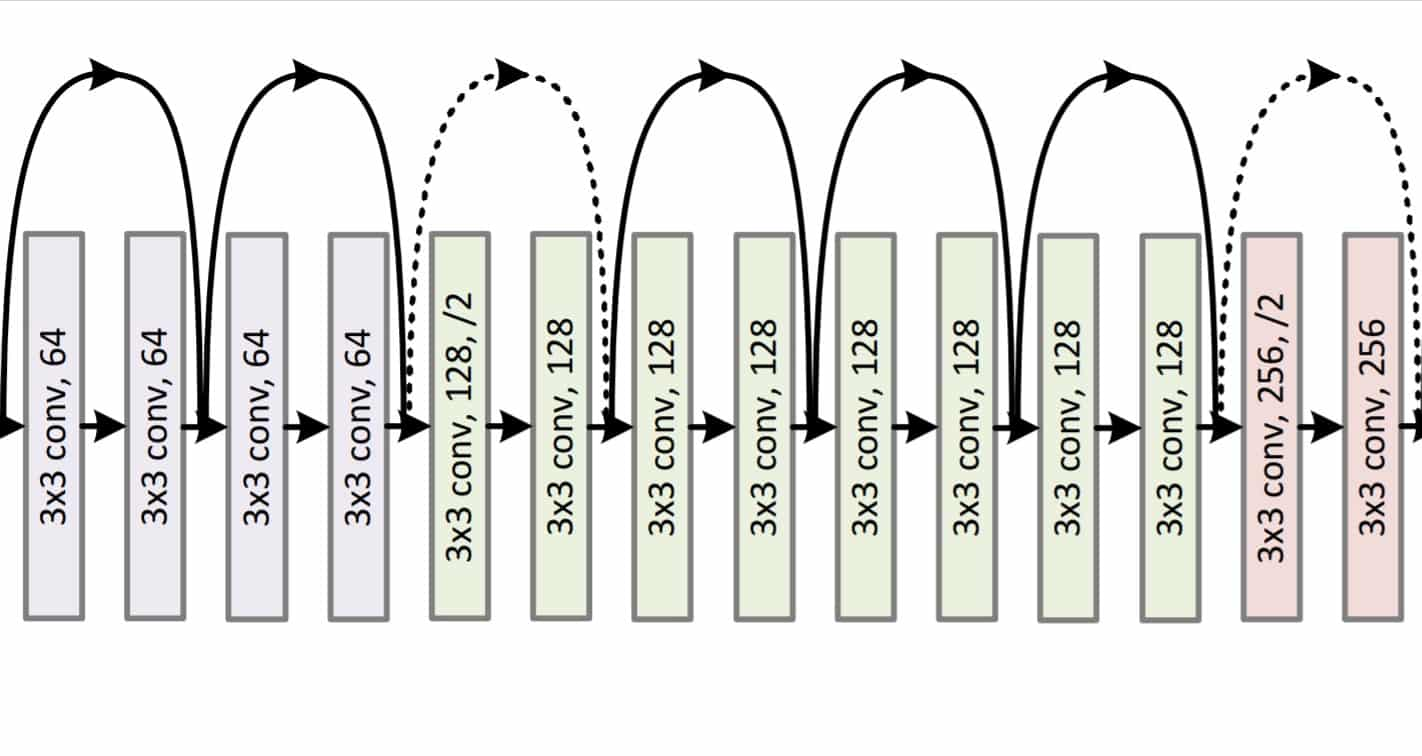

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.bualabs.com%2Farchives%2F482%2Fresnet34-vs-resnet50-deep-learning-pets-cats-dogs-image-classification-with-fastai-v1-ep-2%2F&psig=AOvVaw3y1MrYf3k_H65AfFuvUzOU&ust=1607793519449000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCJii0e63xu0CFQAAAAAdAAAAABAK

Impact of imbalance data on loss function

Loss Function:

    Lcross−entropy(xi)=−(yilog(f(xi))+(1−yi)log(1−f(xi)))
    เราสามารถเขียนLoss ข้ามเอนโทรปีเฉลี่ยโดยรวมในชุดฝึกขนาด D ทั้งหมดได้
 
N as follows
    
    Lcross−entropy(D)=−1N(∑positive exampleslog(f(xi))+∑negative exampleslog(1−f(xi)))
    เมื่อเรามีข้อมูลไม่สมดุลการใช้ฟังก์ชันLossปกติจะส่งผลให้โมเดลมี biase ต่อคลาสที่มีอำนาจเหนือกว่า ทางออกหนึ่งคือการใช้         ฟังก์ชันลดน้ำหนัก การใช้ฟังก์ชันลดน้ำหนักจะปรับสมดุลของการมีส่วนร่วมในฟังก์ชันการสูญเสีย
    
    Lwcross−entropy(x)=−(wpylog(f(x))+wn(1−y)log(1−f(x))).

# เนื่องจากโมเดลเเต่ละตัวนั้นใช้เวลาเทรนนาน ผู้เขียนจึงขอ เทรนเเค่โมเดลละ 2 รอบเท่านั้น เผื่อให้เห็นผลลัพธ์

In [22]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, \
ReLU, Add, GlobalAveragePooling2D, Dense, Input 
import numpy as np
from tensorflow.keras import Model

In [23]:
# Original
def res_block(x_in, n, s=1, k=3) :
    #ตาม paper
    x = Conv2D(n, k, s, padding="same")(x_in)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(n, k, 1, padding="same")(x)
    x = BatchNormalization()(x)

    if s == 2: 
        x_in = Conv2D(n, 1, 2, padding="same")(x_in)# n Filter ConV2D = 1*1 เลื่อนทีละ 2 
    x = Add()([x_in, x])#addition คือการบวก 
    x = ReLU()(x)

    return x

In [24]:
# BN after addition
# paper
def res_block(x_in, n, s=1, k=3) :
    x = Conv2D(n, k, s, padding="same")(x_in)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(n, k, 1, padding="same")(x)
    if s==2:
        x_in = Conv2D(n, 1, 2, padding="same")(x_in)
    x = Add()([x_in, x])
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

In [25]:
# ReLU before addition
def res_block(x_in, n, s=1, k=3) :
    x = Conv2D(n, k, s, padding="same")(x_in)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(n, k, 1, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    if s==2:
        x_in = Conv2D(n, 1, 2, padding="same")(x_in)
    x = Add()([x_in, x])
    return x

In [26]:
# ReLU-only pre-activation
def res_block(x_in, n, s=1, k=3) :
    x = ReLU()(x_in)
    x = Conv2D(n, k, s, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(n, k, 1, padding="same")(x)
    x = BatchNormalization()(x)
    if s==2:
        x_in = Conv2D(n, 1, 2, padding="same")(x_in)
    x = Add()([x_in, x])
    return x

In [27]:
# Full pre-activation
def res_block(x_in,n,s=1,k=3):
    x = BatchNormalization()(x_in)
    x = ReLU()(x)
    x = Conv2D(n,k,s,padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(n, k, 1, padding="same")(x)
    if s==2:
        x_in = Conv2D(n, 1, 2, padding="same")(x_in)
    x = Add()([x_in, x])
    return x

In [28]:
#ResNet34
def resnet34(input_shape=(224, 224, 3), classes=2):
    x_in = Input(shape=input_shape)

    x = Conv2D(64, 7, 2, padding="same")(x_in)
    x = MaxPooling2D(3, 2, padding="same")(x)

    #วิ้่งที่ละ บล็อก
    for i in range(3):
        x = res_block(x, 64)

    x = res_block(x, 128, 2)
    for i in range(3):
        x = res_block(x, 128)

    x = res_block(x, 256, 2)
    for i in range(5):
        x = res_block(x, 256)

    x = res_block(x, 512, 2)
    for i in range(2):
        x = res_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    x = Dense(classes, activation='softmax')(x)

    model = Model(x_in, x)
    model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
    )

    return model

In [29]:
model = resnet34((224, 224, 3), 2)

In [30]:
model.fit(x_train, y_train, batch_size = 50, epochs = 1, verbose=1, shuffle=True, validation_data=(x_val, y_val))

seconds = time.time()
print("Seconds since epoch =", seconds/60)	

105/105 [==============================] - 1182s 11s/step - loss: 3.9431 - accuracy: 0.7429 - val_loss: 5.7514 - val_accuracy: 0.6250
Seconds since epoch = 26806187.58670977


# Evalution Resnet34 Model

In [32]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
Resnet34 = model.evaluate(x_test, y_test,verbose=0)[1]
print("test loss, test acc:", Resnet34)

Evaluate on test data
test loss, test acc: 0.625


# Save Model Resnet34

In [233]:
model.save('resnet34')

INFO:tensorflow:Assets written to: resnet34\assets


# VGG16

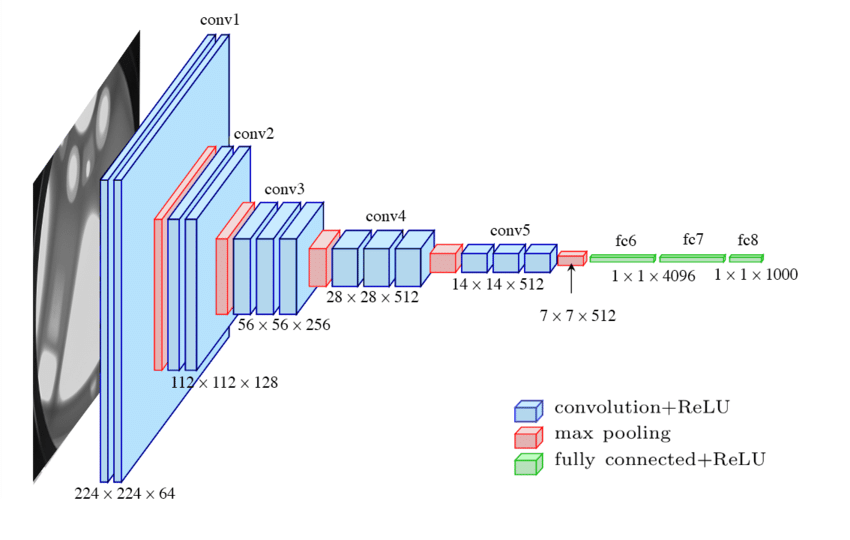

https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Ftowards-artificial-intelligence%2Fthe-architecture-and-implementation-of-vgg-16-b050e5a5920b&psig=AOvVaw15BDwWcV1aBOdAJnQVkeVV&ust=1608367649669000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCPDhzsSS1-0CFQAAAAAdAAAAABAI

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

vgg16 = Sequential()
vgg16.add(Conv2D(32,(3,3), padding="same", activation="relu", input_shape=(224,224,3)))#paddin same ก็คือการทำให้ขนาดของภาพนัั้นไม่ลดขนาดลงไป
vgg16.add(Conv2D(32,(3,3), padding="same", activation="relu"))
vgg16.add(MaxPool2D())

vgg16.add(Conv2D(64, (3,3), padding="same", activation="relu"))
vgg16.add(Conv2D(64, (3,3), padding="same", activation="relu"))
vgg16.add(MaxPool2D())

vgg16.add(Conv2D(128, (3,3), padding="same", activation="relu"))
vgg16.add(Conv2D(128, (3,3), padding="same", activation="relu"))
vgg16.add(Conv2D(128, (3,3), padding="same", activation="relu"))
vgg16.add(MaxPool2D())

vgg16.add(Conv2D(256, (3,3), padding="same", activation="relu"))
vgg16.add(Conv2D(256, (3,3), padding="same", activation="relu"))
vgg16.add(Conv2D(256, (3,3), padding="same", activation="relu"))
vgg16.add(MaxPool2D())

vgg16.add(Conv2D(256, (3,3), padding="same", activation="relu"))
vgg16.add(Conv2D(256, (3,3), padding="same", activation="relu"))
vgg16.add(Conv2D(256, (3,3), padding="same", activation="relu"))
vgg16.add(MaxPool2D())
vgg16.add(Flatten())

vgg16.add(Dense(2096,activation="relu"))
vgg16.add(Dense(2096,activation="relu"))
vgg16.add(Dense(2, activation="softmax"))

vgg16.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
            loss=keras.losses.binary_crossentropy)

In [26]:
VGG16 = vgg16.fit(x_train, y_train, batch_size = 50, epochs = 1, verbose=1, shuffle=True,  validation_data=(x_val, y_val))

105/105 [==============================] - 1025s 10s/step - loss: 0.3506 - val_loss: 0.3101


# Evalution VGG16 Model

In [27]:
print("Evaluate on test data")
v = vgg16.evaluate(x_test, y_test)
print("test loss, test acc:", v)

Evaluate on test data
20/20 [==============================] - 23s 1s/step - loss: 0.3101
test loss, test acc: 0.3101399540901184


# Save Model VGG16

In [28]:
vgg16.save('VGG16')

INFO:tensorflow:Assets written to: VGG16\assets


# Lenet5 

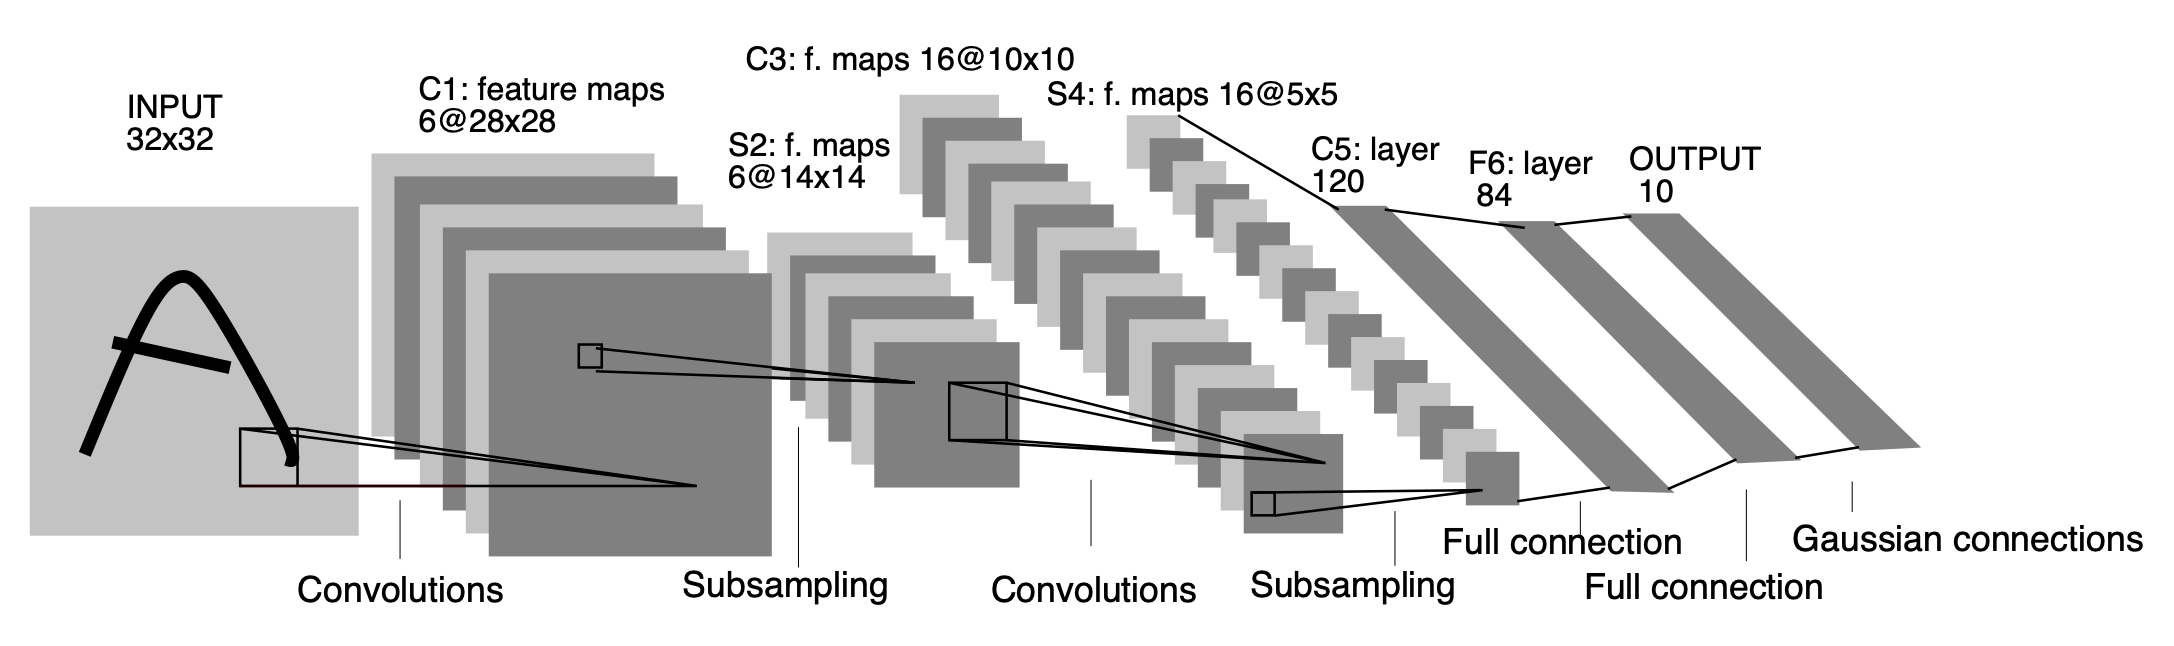

https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Freview-of-lenet-5-how-to-design-the-architecture-of-cnn-8ee92ff760ac&psig=AOvVaw1wcugcVXfaUrFBvst2MNyZ&ust=1608367714942000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCLDo1-OS1-0CFQAAAAAdAAAAABAD

In [15]:
import tensorflow as tf
from tensorflow import keras

lenet5 = keras.Sequential()
lenet5.add(keras.layers.Conv2D(6, (5,5),padding="same",  input_shape=(224,224, 3), activation='relu'))
lenet5.add(keras.layers.MaxPool2D()) 
lenet5.add(keras.layers.Conv2D(16, (5,5),padding="same", activation='relu'))

lenet5.add(keras.layers.MaxPool2D()) 
lenet5.add(keras.layers.Flatten()) 

lenet5.add(keras.layers.Dense(120, activation='relu'))
lenet5.add(keras.layers.Dense(84, activation='relu'))
lenet5.add(keras.layers.Dense(2, activation='softmax'))
lenet5.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
lenet5.fit(x_train, y_train, batch_size = 50, epochs = 10, verbose=1, shuffle=True,  validation_data=(x_val, y_val))

Epoch 1/10
105/105 [==============================] - 92s 878ms/step - loss: 3.9777 - val_loss: 5.7514
Epoch 2/10
105/105 [==============================] - 100s 956ms/step - loss: 3.9431 - val_loss: 5.7514
Epoch 3/10
105/105 [==============================] - 102s 969ms/step - loss: 3.9431 - val_loss: 5.7514
Epoch 4/10
105/105 [==============================] - 102s 971ms/step - loss: 3.9431 - val_loss: 5.7514
Epoch 5/10
105/105 [==============================] - 102s 968ms/step - loss: 3.9431 - val_loss: 5.7514
Epoch 6/10
105/105 [==============================] - 102s 972ms/step - loss: 3.9431 - val_loss: 5.7514
Epoch 7/10
105/105 [==============================] - 102s 973ms/step - loss: 3.9431 - val_loss: 5.7514
Epoch 8/10
105/105 [==============================] - 106s 1s/step - loss: 3.9431 - val_loss: 5.7514
Epoch 9/10
105/105 [==============================] - 103s 979ms/step - loss: 3.9431 - val_loss: 5.7514
Epoch 10/10
105/105 [==============================] - 103s 980ms/st

# Evalution Lenet5 Model

In [23]:
print("Evaluate on test data")
LeNet5 = lenet5.evaluate(x_test, y_test, batch_size= 100)

print("test loss, test acc:", LeNet5)

Evaluate on test data
7/7 [==============================] - 2s 316ms/step - loss: 5.7514
test loss, test acc: 5.751410484313965


# Save Model LenNet5

In [24]:
lenet5.save('LeNet5')

INFO:tensorflow:Assets written to: LeNet5\assets


# เเสดง Evalution ทุกตัว

In [29]:
#Function load_model นี้เป็น function โหลดโมเดล ที่เซิฟไว้
L = keras.models.load_model("LeNet5")
V = keras.models.load_model('VGG16')
R = keras.models.load_model('resnet34')

In [31]:
print("Evaluate Resnet34", R.evaluate(x_test, y_test)) 
print()
print("Evaluate Lenet5", L.evaluate(x_test, y_test)) 
print()
print("Evalution VGG16", V.evaluate(x_test, y_test))


20/20 [==============================] - 21s 1s/step - loss: 5.7514 - accuracy: 0.6250
Evaluate Resnet34 [5.751410484313965, 0.625]

20/20 [==============================] - 3s 170ms/step - loss: 5.7514
Evaluate Lenet5 5.751410484313965

20/20 [==============================] - 25s 1s/step - loss: 0.3101
Evalution VGG16 0.3101399540901184


# จากที่เห็น Model Resnet34 นั้นมีความเเม่นยำสูงสุดจะเลือกมาทำ confustion

# Confustion

In [62]:
false_negative = 0
false_positive = 0
true_negative = 0
true_positive = 0

result = R.predict(x_test)
accuracy = R.evaluate(x_test,y_test)[1]

for i in range(len(x_test)):
    if y_test[i] == 1:
        if result[i] == 1:
            true_positive += 1
        elif result[i] == 0: 
            false_negative += 1
        else:
            print('error class not found')
    if y_test[i] == 0:
        if result[i] == 1:
            false_positive += 1
        elif result[i] == 0: 
            true_negative += 1
        else:
            print('error class not found')
            

20/20 [==============================] - 24s 1s/step - loss: 10.5168 - accuracy: 0.6250


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()